#### 4. Logistic Regression 

In [45]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

In [46]:
df=sns.load_dataset('iris')
df.head()
classification=LogisticRegression();

In [47]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [48]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [49]:
df=df[df['species']!= 'setosa']
df.head()

sepal_length  sepal_width  petal_length  petal_width     species
50           7.0          3.2           4.7          1.4  versicolor
51           6.4          3.2           4.5          1.5  versicolor
52           6.9          3.1           4.9          1.5  versicolor
53           5.5          2.3           4.0          1.3  versicolor
54           6.5          2.8           4.6          1.5  versicolor

In [50]:
df['species']=df['species'].map({'versicolor': 0, 'virginica':1})
df.head()

sepal_length  sepal_width  petal_length  petal_width  species
50           7.0          3.2           4.7          1.4        0
51           6.4          3.2           4.5          1.5        0
52           6.9          3.1           4.9          1.5        0
53           5.5          2.3           4.0          1.3        0
54           6.5          2.8           4.6          1.5        0

In [51]:
## split dataset into independent and dependent variable 
X=df.iloc[:,:-1]
y=df.iloc[:, -1]


In [52]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.33, random_state=42)

In [53]:
parameters={'penalty' : ['l1', 'l2', 'elasticnet'], 'C' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50, 60, 70, 80, 90]}
classification_cv=GridSearchCV(classification , parameters , scoring="accuracy", cv=5)
classification_cv.fit(X_test, y_test)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
180 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1193, in fit
    solver =

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50,
                               60, 70, 80, 90],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [54]:
print(classification_cv.best_params_)
print(classification_cv.best_score_)

{'C': 4, 'penalty': 'l2'}
0.9380952380952381


In [56]:
classification_pred=classification_cv.predict(X_test)
accuracy=accuracy_score(classification_pred, y_test)
classification=classification_report(classification_pred, y_test)
accuracy
classification



'              precision    recall  f1-score   support\n\n           0       0.95      1.00      0.97        18\n           1       1.00      0.93      0.97        15\n\n    accuracy                           0.97        33\n   macro avg       0.97      0.97      0.97        33\nweighted avg       0.97      0.97      0.97        33\n'

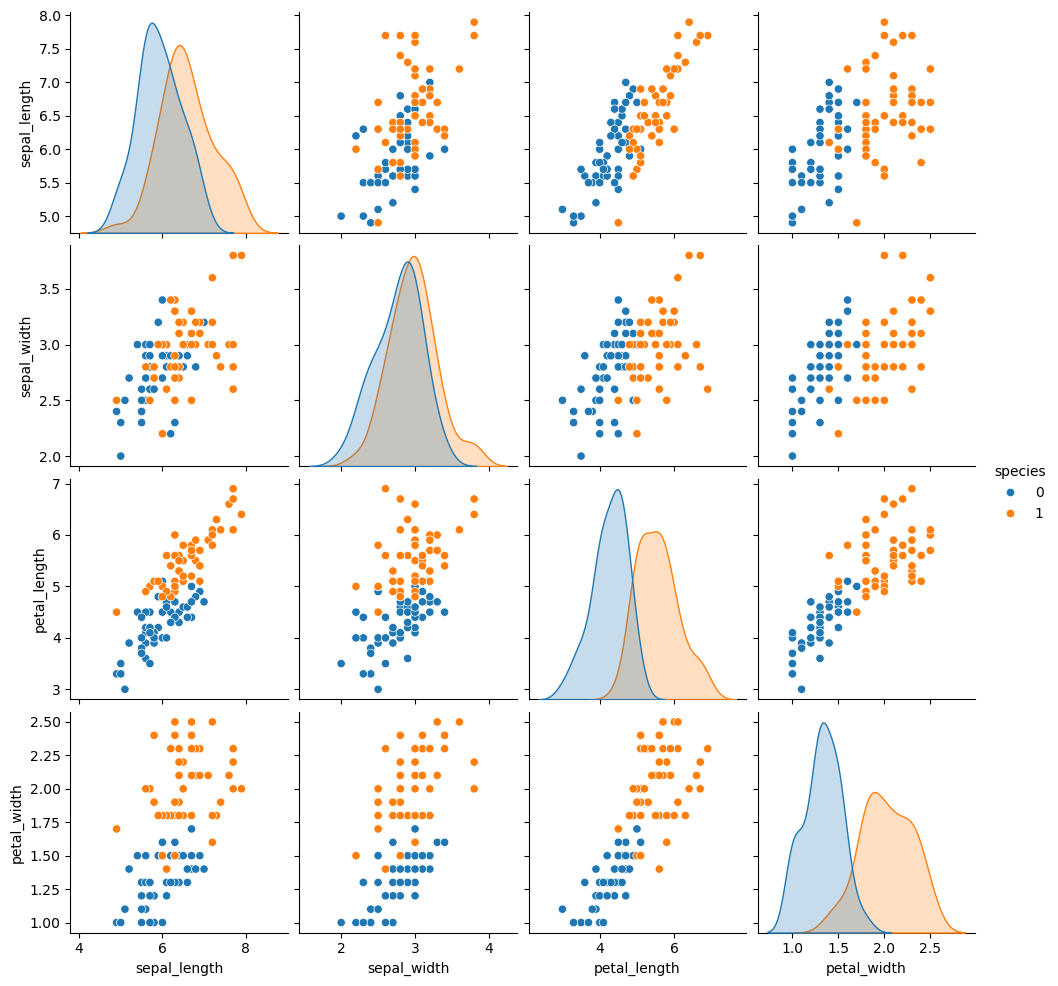

In [60]:
sns.pairplot(df,hue='species')

In [61]:
df.corr()

sepal_length  sepal_width  petal_length  petal_width   species
sepal_length      1.000000     0.553855      0.828479     0.593709  0.494305
sepal_width       0.553855     1.000000      0.519802     0.566203  0.308080
petal_length      0.828479     0.519802      1.000000     0.823348  0.786424
petal_width       0.593709     0.566203      0.823348     1.000000  0.828129
species           0.494305     0.308080      0.786424     0.828129  1.000000